<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Model_Selection_and_Bias_Variance_Tradeoff_in_Healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

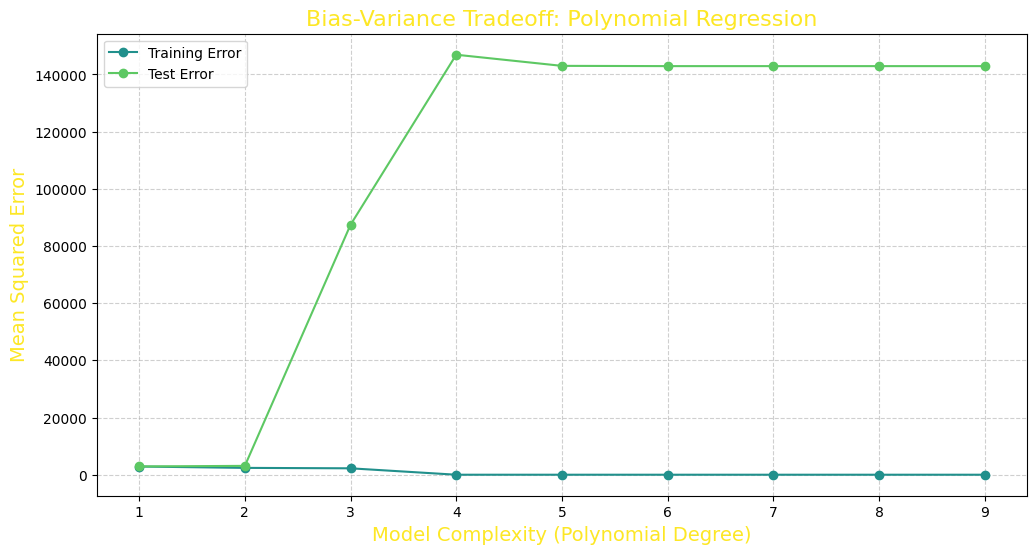

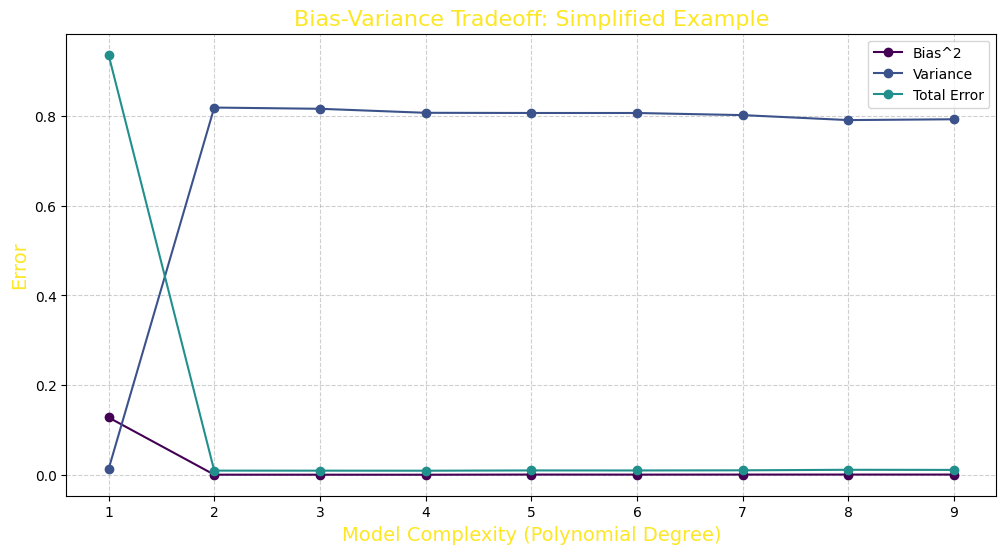

Ridge Regression Test MSE: 3077.42
Lasso Regression Test MSE: 2798.19


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# I need to analyze the bias-variance tradeoff using a real-world healthcare dataset.
# I will use the Diabetes dataset provided by sklearn to explore this topic.
from sklearn.datasets import load_diabetes
data = load_diabetes()
X, y = data.data, data.target
feature_names = data.feature_names

# I want the data in a DataFrame format because it will be easier for me to visualize and manipulate.
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Now I need to split the data into training and test sets so that I can evaluate model performance.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# I want to assess how model complexity impacts performance, so I’ll create a function
# that calculates training and test errors for models of varying complexity.
def model_assessment(X_train, y_train, X_test, y_test, degrees):
    train_errors, test_errors = [], []
    for degree in degrees:
        # I’m using polynomial features to add complexity to the model.
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        # I’ll use a simple linear regression model to fit the transformed data.
        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        # I need to calculate errors for both training and test data.
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)

        train_errors.append(mean_squared_error(y_train, y_train_pred))
        test_errors.append(mean_squared_error(y_test, y_test_pred))

    return train_errors, test_errors

# I want to see how the bias-variance tradeoff plays out with polynomial regression.
degrees = range(1, 10)
train_errors, test_errors = model_assessment(X_train, y_train, X_test, y_test, degrees)

# I’ll plot the training and test errors to visually understand the bias-variance tradeoff.
plt.figure(figsize=(12, 6))
plt.plot(degrees, train_errors, 'o-', label='Training Error', color='#21908CFF')
plt.plot(degrees, test_errors, 'o-', label='Test Error', color='#5DC863FF')
plt.title('Bias-Variance Tradeoff: Polynomial Regression', fontsize=16, color='#FDE725FF')
plt.xlabel('Model Complexity (Polynomial Degree)', fontsize=14, color='#FDE725FF')
plt.ylabel('Mean Squared Error', fontsize=14, color='#FDE725FF')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Now, I want to simulate a simpler example of the bias-variance tradeoff to make sure I truly understand it.
def bias_variance_tradeoff(degree_range):
    np.random.seed(42)
    X_simple = np.random.uniform(-1, 1, 100).reshape(-1, 1)
    y_simple = 3 * X_simple.ravel() ** 2 + np.random.normal(0, 0.1, size=X_simple.shape[0])

    # I need to split this simpler dataset to observe the bias-variance tradeoff more clearly.
    X_train, X_test, y_train, y_test = train_test_split(X_simple, y_simple, test_size=0.3)

    # I’ll calculate bias, variance, and total error for models of varying complexity.
    bias, variance, total_error = [], [], []
    for degree in degree_range:
        poly = PolynomialFeatures(degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        y_pred = model.predict(X_test_poly)
        error = mean_squared_error(y_test, y_pred)

        # I need to estimate bias and variance to understand the tradeoff.
        bias_sq = (np.mean(y_pred) - np.mean(y_test)) ** 2
        variance_value = np.var(y_pred)
        bias.append(bias_sq)
        variance.append(variance_value)
        total_error.append(error)

    return bias, variance, total_error

# I’ll now observe the bias-variance tradeoff in action.
degree_range = range(1, 10)
bias, variance, total_error = bias_variance_tradeoff(degree_range)

plt.figure(figsize=(12, 6))
plt.plot(degree_range, bias, 'o-', label='Bias^2', color='#440154FF')
plt.plot(degree_range, variance, 'o-', label='Variance', color='#3B528BFF')
plt.plot(degree_range, total_error, 'o-', label='Total Error', color='#21908CFF')
plt.title('Bias-Variance Tradeoff: Simplified Example', fontsize=16, color='#FDE725FF')
plt.xlabel('Model Complexity (Polynomial Degree)', fontsize=14, color='#FDE725FF')
plt.ylabel('Error', fontsize=14, color='#FDE725FF')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# I also want to experiment with Ridge and Lasso regression to see how regularization affects performance.
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

ridge_preds = ridge.predict(X_test)
lasso_preds = lasso.predict(X_test)

# I’ll compare the errors for Ridge and Lasso regression to see which one works better.
ridge_error = mean_squared_error(y_test, ridge_preds)
lasso_error = mean_squared_error(y_test, lasso_preds)

print(f"Ridge Regression Test MSE: {ridge_error:.2f}")
print(f"Lasso Regression Test MSE: {lasso_error:.2f}")
